In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [0]:
# parameters
batch_size = 100
training_epochs = 20
nb_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:

# convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(img_rows ,img_cols)))
model.add(Dense(units=nb_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
history=model.fit(X_train, Y_train, batch_size=batch_size, 
                  epochs=training_epochs, verbose=2,
                  validation_split=0.2)

W0723 00:20:45.081023 140594384426880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 1s - loss: 0.6801 - accuracy: 0.8340 - val_loss: 0.3799 - val_accuracy: 0.9025
Epoch 2/20
48000/48000 - 1s - loss: 0.3682 - accuracy: 0.9010 - val_loss: 0.3190 - val_accuracy: 0.9145
Epoch 3/20
48000/48000 - 1s - loss: 0.3249 - accuracy: 0.9112 - val_loss: 0.2993 - val_accuracy: 0.9175
Epoch 4/20
48000/48000 - 1s - loss: 0.3048 - accuracy: 0.9151 - val_loss: 0.2841 - val_accuracy: 0.9222
Epoch 5/20
48000/48000 - 1s - loss: 0.2926 - accuracy: 0.9187 - val_loss: 0.2788 - val_accuracy: 0.9218
Epoch 6/20
48000/48000 - 1s - loss: 0.2844 - accuracy: 0.9208 - val_loss: 0.2737 - val_accuracy: 0.9243
Epoch 7/20
48000/48000 - 1s - loss: 0.2777 - accuracy: 0.9228 - val_loss: 0.2715 - val_accuracy: 0.9248
Epoch 8/20
48000/48000 - 1s - loss: 0.2733 - accuracy: 0.9230 - val_loss: 0.2676 - val_accuracy: 0.9262
Epoch 9/20
48000/48000 - 1s - loss: 0.2691 - accuracy: 0.9248 - val_loss: 0.2660 - val_accuracy: 0.9270
Epoch 10/20
48

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [11]:
print('Test loss = ', score[0], 'Test accuracy = ', score[1])

Test loss =  0.2667955459535122 Test accuracy =  0.927


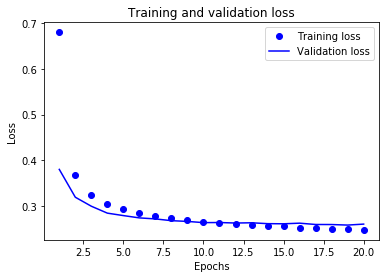

In [12]:
history_dict = history.history
#print(history_dict.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

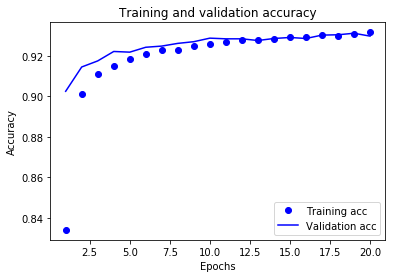

In [13]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()